In [46]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk
import seaborn as sns

In [42]:
# Define the path to the directory containing subject folders
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# Change to 1 to save figures to fig_dir
save_figs = 0

In [43]:
# Calculate mean SCR Amplitude for each subject for sessions 1-5b
import os

sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means = {}

for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    # Loop through subjects
    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                mean_SCR_Amp = df_session['SCR_Amplitude'].mean()
                session_means[session_name].append([sub_dir, mean_SCR_Amp])

    session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_SCR_Amp'])

# Display one df
print(session_means['session1'])

  subject  mean_SCR_Amp
0   sub-1      0.010503
1   sub-8      0.000095
2   sub-9      0.000107
3   sub-7      0.000211
4  sub-10      0.000105
5  sub-11      0.000117
6   sub-2      0.001018
7   sub-4      0.000104
8   sub-3      0.002554


In [38]:
import os
import pandas as pd

base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'

sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means = {}

for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    # Loop through subjects
    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                mean_SCR_Amp = df_session['SCR_Amplitude'].mean()
                session_means[session_name].append([sub_dir, mean_SCR_Amp])

    session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_SCR_Amp'])

# Concatenate all session means DataFrames into a single DataFrame
all_session_means = pd.concat(session_means.values(), ignore_index=True)

# Add a column to indicate the session
all_session_means['session'] = all_session_means.index.map(lambda x: session_names[x // len(session_means['session1'])])

# Display the combined DataFrame
print(all_session_means)


   subject  mean_SCR_Amp    session
0    sub-1      0.010503   session1
1    sub-8      0.000095   session1
2    sub-9      0.000107   session1
3    sub-7      0.000211   session1
4   sub-10      0.000105   session1
5   sub-11      0.000117   session1
6    sub-2      0.001018   session1
7    sub-4      0.000104   session1
8    sub-3      0.002554   session1
9    sub-1      0.003853   session2
10   sub-8      0.000082   session2
11   sub-9      0.000936   session2
12   sub-7      0.000066   session2
13  sub-10      0.000095   session2
14  sub-11      0.000104   session2
15   sub-2      0.000082   session2
16   sub-4      0.000626   session2
17   sub-3      0.002505   session2
18   sub-1      0.004949   session3
19   sub-9      0.000094   session3
20  sub-10      0.000085   session3
21  sub-11      0.000088   session3
22   sub-2      0.000093   session3
23   sub-4      0.000419   session3
24   sub-3      0.004169   session3
25   sub-1      0.003526   session3
26   sub-8      0.000084   s

In [35]:
import os
import pandas as pd

base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'

sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means = {}

for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    # Loop through subjects
    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                mean_SCR_Amp = df_session['SCR_Amplitude'].mean()
                session_means[session_name].append([sub_dir, mean_SCR_Amp])

    session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_SCR_Amp'])

# Concatenate all session means DataFrames into a single DataFrame
all_session_means = pd.concat(session_means.values(), ignore_index=True)

# Add a column to indicate the session
all_session_means['session'] = all_session_means.index.map(lambda x: session_names[x // len(session_means['session1'])])

# Pivot the DataFrame to get the desired format
result = all_session_means.pivot(index='subject', columns='session', values='mean_SCR_Amp')

# Display the result
print(result)

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
# Plot each subject's mean SCR amplitude for each session

all_sessions = []
for session_name, df in session_means.items():
    df['session'] = session_name  # Add a session column
    all_sessions.append(df)

df_all_sessions = pd.concat(all_sessions, ignore_index=True)



subject_order = [f'sub-{i}' for i in range(1, 11)] 
df_all_sessions['subject'] = pd.Categorical(df_all_sessions['subject'], categories=subject_order, ordered=True)
df_all_sessions = df_all_sessions.sort_values(by=['subject', 'session'])

plt.figure(figsize=(14, 8))

labels = ['Session 1 \n Apartment A', 
          'Session 2\n Apartment B', 
          'Session 3\n Apartment C', 
          'Session 4\n Apartment C', 
          'Session 5\n Apartment A \n (Distant Condition)',
          'Session 5\n Apartment B \n (Near Condition)']

for subject in df_all_sessions['subject'].unique():
    df_subject = df_all_sessions[df_all_sessions['subject'] == subject]
    sns.lineplot(data=df_subject, x='session', y='mean_SCR_Amp', marker='s', markersize=10, label=subject)

plt.title(None)
plt.xlabel(None)
plt.xticks(ticks=plt.xticks()[0], labels=labels, fontsize=12)
plt.ylabel('Mean SCR Amp \n', fontsize = 14)
plt.legend(title=None, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.tight_layout()
sns.despine()

if save_figs == 1:
    plt.savefig(f"{fig_dir}/all-participant-session-means.png", dpi=300)

In [16]:
import os
import pandas as pd
import numpy as np
import glob

# Define the main directory containing the participant folders
main_directory = "/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs/sub-1"

# Iterate through participant folders
for participant_folder in os.listdir(main_directory):
    participant_path = os.path.join(main_directory, participant_folder)

    # Check if it's a directory
    if os.path.isdir(participant_path):
        # Find all CSV files within the participant folder
        csv_files = glob.glob(os.path.join(participant_path, "*.csv"))

        # Process each CSV file
        for csv_file in csv_files:
            df = pd.read_csv(csv_file)
            # Extract amplitude data
            amplitude_data = df['SCR_Amplitude']  # Replace 'amplitude' with your actual column name

            # Calculate mean amplitude for this trial
            mean_amplitude = np.mean(amplitude_data)

            # Store the mean amplitude for this participant and trial
            # (You might want to use a data structure like a dictionary or DataFrame)

# Further analysis or output of the results

# Assuming the amplitude data is in a column named 'amplitude'
amplitudes = []
dataframes = []
for df in dataframes:
    amplitudes.append(df['SCR_Amplitude'])

mean_amplitudes_per_session = [np.mean(amplitudes[i]) for i in range(len(amplitudes))]

mean_amplitude_all_participants = np.mean(amplitudes)

print("Mean amplitude for each session:")
print(mean_amplitudes_per_session)

print("Mean amplitude for all participants:")
print(mean_amplitude_all_participants)

session-2.csv
session-3.csv
session-5b.csv
session-1.csv
session-5a.csv
session-4.csv
Mean amplitude for each session:
[]
Mean amplitude for all participants:
nan


In [39]:
import os
import pandas as pd

def sum_data_across_csv(directory, column_name):
  """
  Sums a specific column across all CSV files in a directory structure.

  Args:
    directory: The root directory containing the CSV files.
    column_name: The name of the column to sum.

  Returns:
    A dictionary where keys are subject names and values are the summed values.
  """

  results = {}
  for root, dirs, files in os.walk(directory):
    for file in files:
      if file.endswith(".csv"):
        subject_name = os.path.basename(root)
        df = pd.read_csv(os.path.join(root, file))
        sum_value = df[column_name].sum()
        results[subject_name] = results.get(subject_name, 0) + sum_value
  return results

# Replace 'your_directory' with the actual path to your 'subject-cvs' folder
directory = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
column_to_sum = 'SCR_Amplitude'  # Replace with the actual column name

sums = sum_data_across_csv(directory, column_to_sum)
for (subject, session), sum_value in sums.items():
  print(f"Subject: {subject}, Session: {session}, Sum: {sum_value}")

ValueError: too many values to unpack (expected 2)

In [26]:
import os
import pandas as pd

def sum_data_across_csv(directory, column_name):
  """
  Sums a specific column across all CSV files in a directory structure, grouping by subject and session.

  Args:
    directory: The root directory containing the CSV files.
    column_name: The name of the column to sum.

  Returns:
    A list of dictionaries, where each dictionary represents a subject and contains
    'subject_name', 'session_name', and 'sum' keys.
  """

  results = []
  for root, dirs, files in os.walk(directory):
    for file in files:
      if file.endswith(".csv"):
        subject_name = os.path.basename(root)
        session_name = os.path.splitext(file)[0].split("-")[-1]
        df = pd.read_csv(os.path.join(root, file))
        sum_value = df[column_name].sum()
        results.append({
          'subject_name': subject_name,
          'session_name': session_name,
          'sum': sum_value
        })
  return results

# Replace 'your_directory' with the actual path to your 'subject-cvs' folder
directory = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
column_to_sum = 'SCR_Amplitude'  # Replace with the actual column name

sums = sum_data_across_csv(directory, column_to_sum)

# Print the results in a more readable format
for result in sums:
  print(f"Subject: {result['subject_name']}, Session: {result['session_name']}, Sum: {result['sum']}")

Subject: sub-1, Session: 2, Sum: 6.58064946719142
Subject: sub-1, Session: 3, Sum: 9.582103247613386
Subject: sub-1, Session: 5b, Sum: 10.748730030826252
Subject: sub-1, Session: 1, Sum: 18.653836722837518
Subject: sub-1, Session: 5a, Sum: 14.853588612686217
Subject: sub-1, Session: 4, Sum: 6.37573411593047
Subject: sub-8, Session: 2, Sum: 0.1526172095945914
Subject: sub-8, Session: 5b, Sum: 1.4749249517137455
Subject: sub-8, Session: 1, Sum: 0.18560992294665551
Subject: sub-8, Session: 5a, Sum: 3.677731210457062
Subject: sub-8, Session: 4, Sum: 0.15214345796711304
Subject: sub-9, Session: 2, Sum: 1.7499150144334927
Subject: sub-9, Session: 3, Sum: 0.17617826324590122
Subject: sub-9, Session: 5b, Sum: 0.18201155091046387
Subject: sub-9, Session: 1, Sum: 0.198768415832042
Subject: sub-9, Session: 5a, Sum: 0.17116505989473121
Subject: sub-9, Session: 4, Sum: 8.013159015289354
Subject: sub-7, Session: 2, Sum: 0.12187988677753794
Subject: sub-7, Session: 5b, Sum: 1.6152797110500736
Subject

In [50]:
import os
import pandas as pd
from prettytable import PrettyTable

def sum_data_across_csv(directory, column_name):
  """
  Sums a specific column across all CSV files in a directory structure, grouping by subject and session.

  Args:
    directory: The root directory containing the CSV files.
    column_name: The name of the column to sum.

  Returns:
    A pandas DataFrame containing the summed values for each subject and session.
  """

  results = []
  for root, dirs, files in os.walk(directory):
    for file in files:
      if file.endswith(".csv"):
        subject_name = os.path.basename(root)
        session_name = os.path.splitext(file)[0].split("-")[-1]
        df = pd.read_csv(os.path.join(root, file))
        sum_value = df[column_name].sum()
        results.append({
          'subject_name': subject_name,
          'session_name': session_name,
          'sum': sum_value
        })

  df = pd.DataFrame(results)
  return df

# Replace 'your_directory' with the actual path to your 'subject-csvs' folder
directory = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
column_to_sum = 'SCR_Amplitude'  # Replace with the actual column name

sums = sum_data_across_csv(directory, column_to_sum)

# Print the results in a tabular format using prettytable
table = PrettyTable(["Subject Name", "Session Name", "Sum"])
for index, row in sums.iterrows():
  table.add_row([row['subject_name'], row['session_name'], row['sum']])
print(table)

ModuleNotFoundError: No module named 'prettytable'

AttributeError: 'list' object has no attribute 'items'

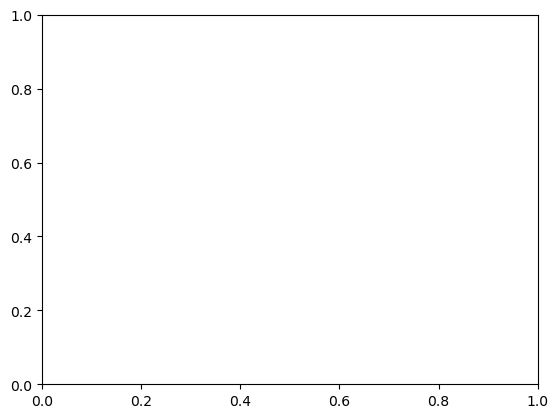

In [31]:
import matplotlib.pyplot as plt

# Assuming you have the 'sums' list from the previous code

# Extract subject names, session names, and summed values
subject_names = [result['subject_name'] for result in sums]
session_names = [result['session_name'] for result in sums]
scr_amplitudes = [result['sum'] for result in sums]


# Create the plot
fig, ax = plt.subplots()

# Plot lines for each subject
for subject_names, values in scr_amplitudes.items():
  ax.plot(session_names, values, label=subject)

# Set labels and title
ax.set_xlabel("Sessions")
ax.set_ylabel("SCR Amplitude (Sum)")
ax.set_title("SCR Amplitude per Session per Subject")

# Add legend
ax.legend()

# Show the plot
plt.show()

ValueError: x and y must have same first dimension, but have shapes (51,) and (6,)

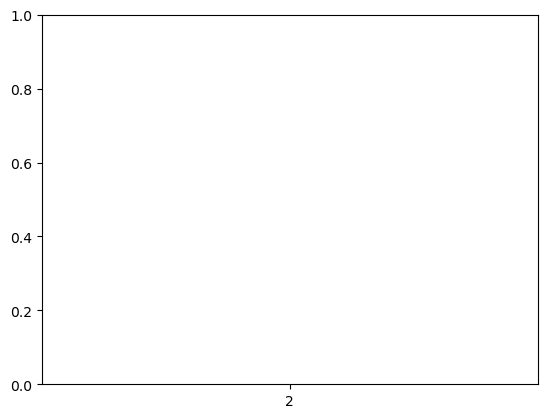

In [30]:
import matplotlib.pyplot as plt

# Assuming you have the 'sums' list from the previous code

# Extract subject names, session names, and summed values
subject_names = [result['subject_name'] for result in sums]
session_names = [result['session_name'] for result in sums]
scr_amplitudes = [result['sum'] for result in sums]


# Create the plot
fig, ax = plt.subplots()

# Loop through subjects and their corresponding values (more efficient)
for i, subject_name in enumerate(set(subject_names)):  # Use set to get unique subjects
  subject_data = [scr_amplitude for scr_amplitude, subj in zip(scr_amplitudes, subject_names) if subj == subject_name]
  ax.plot(session_names, subject_data, label=subject_name)

# Set labels and title
ax.set_xlabel("Sessions")
ax.set_ylabel("SCR Amplitude (Sum)")
ax.set_title("SCR Amplitude per Session per Subject")

# Add legend
ax.legend()

# Show the plot
plt.show()
